# Section 1: Introduction to the Problem

hello world

# Section 2: Dataset Description

[Provide a brief description of the dataset]





## Section 2.1 : Source of the dataset
[State the source of the dataset and how it was collected.]

In [2]:
# Clone the GitHub repository where the dataset is stored
!git clone https://github.com/NeoRedcraft/dl-project-1

Cloning into 'dl-project-1'...
remote: Enumerating objects: 5785, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5785 (delta 0), reused 0 (delta 0), pack-reused 5780 (from 2)
Receiving objects: 100% (5785/5785), 215.40 MiB | 29.80 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (5764/5764), done.


## Section 2.2: Dataset Structure
[Explain the dataset structure (number of images, labels, categories)]

## Section 2.3: Preprocessing Steps
[Discuss any preprocessing steps applied (resizing, augmentation, annotation formats,
etc.)]

/content/dl-project-1/data/dl-project-1.v2i.yolov12


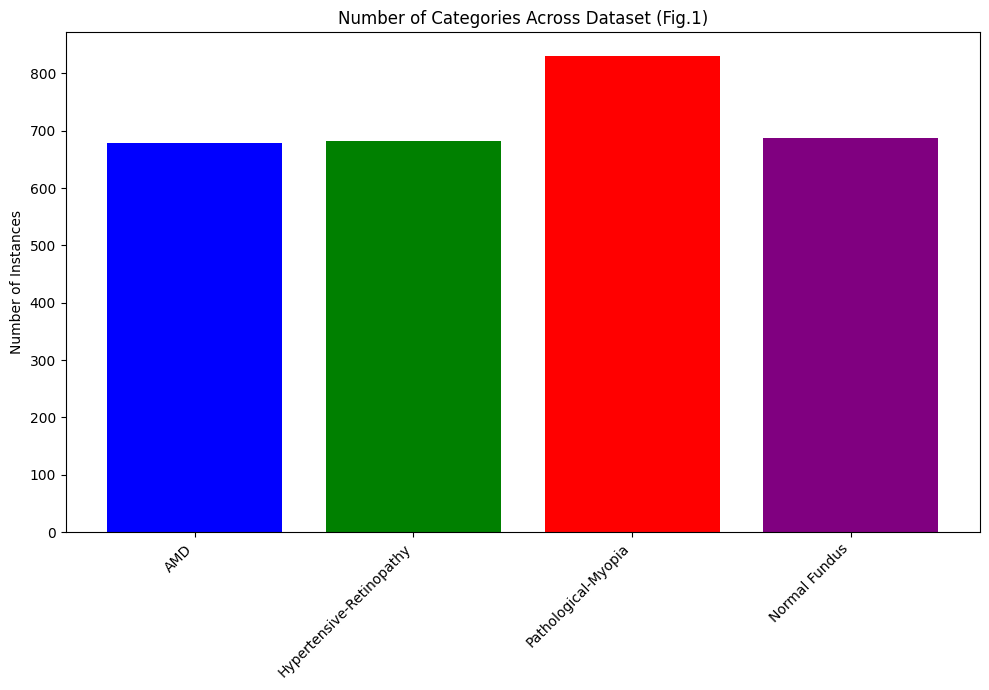

In [3]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Change to the directory containing the dataset folders
%cd /content/dl-project-1/data/dl-project-1.v2i.yolov12

# Define the paths to the train, valid, and test image folders
train_images_path = 'train/images'
valid_images_path = 'valid/images'
test_images_path = 'test/images'

# Define the keywords to look for in image filenames for the other classes
amd_keyword = 'AMD'
hypertensive_keyword = 'Hypertensive-Retinopathy'
myopia_keyword = 'Pathological-Myopia'
normal_fundus_name = 'Normal Fundus'
other_class_keywords = [amd_keyword.lower(), hypertensive_keyword.lower(), myopia_keyword.lower()]

# Function to count images for the specific disease classes based on filename keywords
def count_disease_classes_by_filename(image_folder):
    class_counts = defaultdict(int)
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_filename in image_files:
        filename_lower = image_filename.lower()
        if amd_keyword.lower() in filename_lower:
            class_counts[amd_keyword] += 1
        elif hypertensive_keyword.lower() in filename_lower:
            class_counts[hypertensive_keyword] += 1
        elif myopia_keyword.lower() in filename_lower:
            class_counts[myopia_keyword] += 1

    return class_counts

# Function to count Normal Fundus images based on the absence of other class keywords in filename
def count_normal_fundus_by_filename(image_folder):
    normal_fundus_count = 0
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_filename in image_files:
        filename_lower = image_filename.lower()
        is_other_class = False
        for keyword in other_class_keywords:
            if keyword in filename_lower:
                is_other_class = True
                break
        if not is_other_class:
            normal_fundus_count += 1

    return normal_fundus_count


# Count classes in each split based on filenames
train_disease_counts = count_disease_classes_by_filename(train_images_path)
train_normal_fundus_count = count_normal_fundus_by_filename(train_images_path)

valid_disease_counts = count_disease_classes_by_filename(valid_images_path)
valid_normal_fundus_count = count_normal_fundus_by_filename(valid_images_path)

test_disease_counts = count_disease_classes_by_filename(test_images_path)
test_normal_fundus_count = count_normal_fundus_by_filename(test_images_path)


# Combine counts from all splits
total_class_counts = defaultdict(int)
all_class_names = [amd_keyword, hypertensive_keyword, myopia_keyword, normal_fundus_name]

# Sum disease counts
for class_name in [amd_keyword, hypertensive_keyword, myopia_keyword]:
    total_class_counts[class_name] = (
        train_disease_counts[class_name] +
        valid_disease_counts[class_name] +
        test_disease_counts[class_name]
    )

# Sum Normal Fundus counts
total_class_counts[normal_fundus_name] = (
    train_normal_fundus_count +
    valid_normal_fundus_count +
    test_normal_fundus_count
)


# Prepare data for the bar graph
labels = list(total_class_counts.keys())
counts = list(total_class_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 7))
plt.bar(labels, counts, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Number of Instances')
plt.title('Number of Categories Across Dataset (Fig.1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

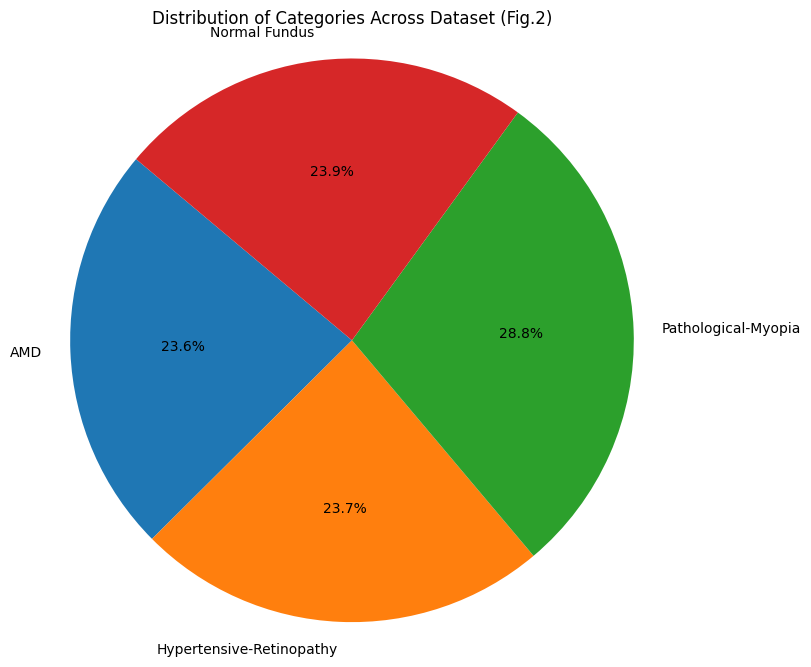

Total number of instances for each class:
AMD: 678
Hypertensive-Retinopathy: 682
Pathological-Myopia: 830
Normal Fundus: 688


In [4]:
# Prepare data for the pie chart
pie_labels = list(total_class_counts.keys())
pie_sizes = list(total_class_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories Across Dataset (Fig.2)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print total number for each class
print("Total number of instances for each class:")
for label, count in zip(pie_labels, pie_sizes):
    print(f"{label}: {count}")

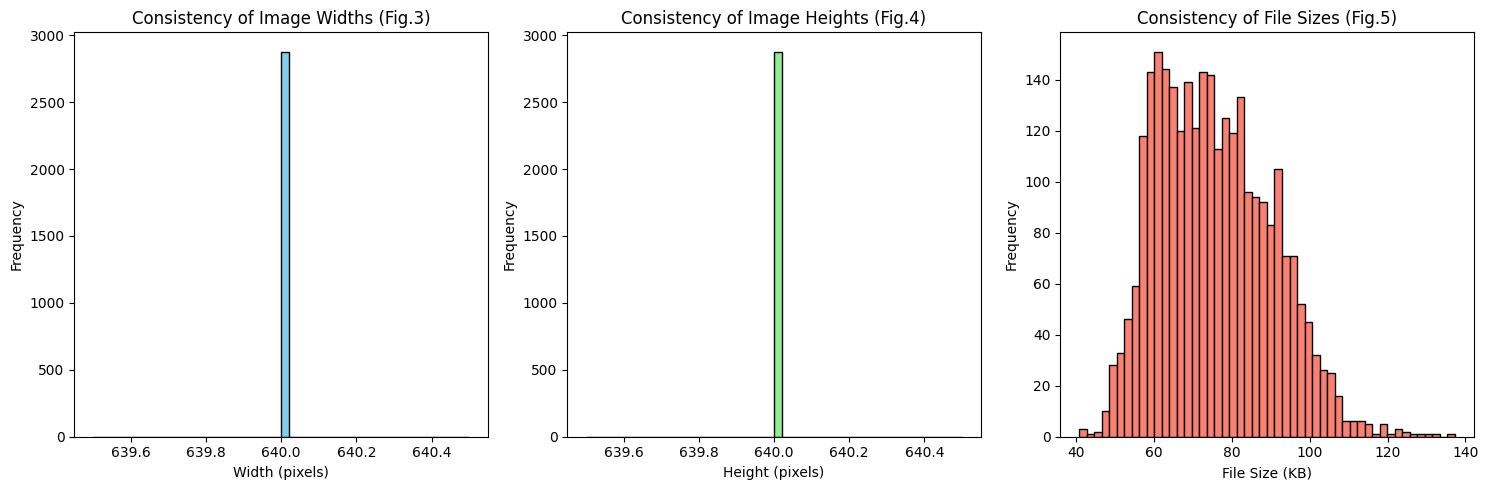

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to the train, valid, and test image folders
train_images_path = 'train/images'
valid_images_path = 'valid/images'
test_images_path = 'test/images'

# List of all image folders
image_folders = [train_images_path, valid_images_path, test_images_path]

# Initialize lists to store image attributes
resolutions = []
file_sizes = []
aspect_ratios = []

# Iterate through each image folder and collect attributes
for folder_path in image_folders:
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(folder_path, filename)

            # Get file size
            file_size_kb = os.path.getsize(filepath) / 1024  # in KB
            file_sizes.append(file_size_kb)

            try:
                # Open image to get resolution and calculate aspect ratio
                with Image.open(filepath) as img:
                    width, height = img.size
                    resolutions.append((width, height))
                    aspect_ratios.append(width / height)
            except Exception as e:
                print(f"Could not process image {filepath}: {e}")


# Prepare data for histograms
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

# Create histograms
plt.figure(figsize=(15, 5))

# Histogram of Image Widths
plt.subplot(1, 3, 1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Widths (Fig.3)')

# Histogram of Image Heights
plt.subplot(1, 3, 2)
plt.hist(heights, bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Heights (Fig.4)')

# Histogram of File Sizes
plt.subplot(1, 3, 3)
plt.hist(file_sizes, bins=50, color='salmon', edgecolor='black')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.title('Consistency of File Sizes (Fig.5)')

plt.tight_layout()
plt.show()


# Section 3: Requirements

## Python Libraries Used

In [7]:
!pip install ultralytics
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu121


# Section 4: Model Training

[Describe the model architecture and training pipeline.]

## Section 4.1: Training Hyperparameters

[Show training hyperparameters (learning rate, batch size, epochs).]

## Section 4.2: Performance Metrics

[Report performance metrics (mAP, IoU, precision, recall)]

## Section 4.3: Model Checkpoints

[Save and document model checkpoints]

# Section 5: Model Testing (Unseen Data)

[Explain your train/val/test split strategy. ]

## Section 5.1: Performance Metrics on Test set

[Report final metrics on this held-out test set (e.g., mAP@.5:.95, IoU,
precision/recall per class),]

## Section 5.2: Example of Dectections and Segmentations

[ present visual examples of detections/segmentations. Discuss
generalization, failure cases, and how results differ from validation.]

# Section 6: Web Deployment

[About the deployment]

## 6.1: Streamlit Guide

In [8]:
# insert

### 6.1.1: User Uploded Image and Run Interface

In [9]:
# insert

### 6.1.2: Display Detection and Segmentation Results

In [10]:
# insert

# Section 7: Results and Analysis

[Overall Performance]

## Section 7.1: Quantative Results and Analysis

[metrics - Discuss strengths, weaknesses, and edge cases.]

In [11]:
#insert

## Section 7.2: Qualitative Results and Analysis

[visual examples - Discuss strengths, weaknesses, and edge cases.]

In [12]:
#insert

# Section 8 Documentation

[IEEE Paper]

## Section 8.1: Abstract

## Section 8.2: Introduction

## Section 8.3: Methodology
[dataset, model, training, deployment]

## Section 8.4: Results and Discussion

## Section 8.5: Conclusion and Future Work

## Section 8.6: References
[IEEE style]

# Section 9: Insights and conclusion

[Summarize what your group learned about building an computer vision system. Discuss the
strengths and limitations and suggest areas for future improvement.]

# Section 10: References

[Cite relevant references that you used in your project. All references must be cited, including:]

## Section 10.1: Scholarly Articles
[Cite in APA format, and put a description of how you used it for your work.]

## Section 10.2: Online References
[Put the website, blog, or article title, link, and how you incorporated it into your
work]

## Section 10.3: Artifical Intelligence Tools
[Put the model used (e.g., ChatGPT, Gemini), the complete transcript of your
conversations with the model (including your prompts and its responses), and a
description of how you used it for your work.]